### Mental health data

Import the data and and take a look into 5 rows

In [584]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Files/Mental health Depression disorder Data.csv', low_memory=False) #Low_memory to hide the error of different datatypes.
df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


Let's check data's shape

In [585]:
df.shape

(108553, 11)

Let's call info function to review every column

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


### Data Wrangling

First let stay just countries in Entity column and rename the column to Country

In [587]:
print(df.shape) #Shape of data before droping rows that are not countries
df = df.loc[~df.Entity.str.match('Australasia|Andean Latin America|Caribbean|Central African Republic|Central Asia|Central Europe|Central Europe, Eastern Europe, and Central Asia|Central Latin America|Central Sub-Saharan Africa|East Asia|Eastern Europe|Eastern Sub-Saharan Africa|High-income Asia Pacific|High-middle SDI|Latin America and Caribbean|Low SDI|Low-middle SDI|Middle SDI|North Africa and Middle East|North America|South Asia|South Asia|Southeast Asia, East Asia, and Oceania|Southern Latin America|Southern Sub-Saharan Africa|Tropical Latin America|Western Europe|Western Sub-Saharan Africa')] #Select everyhting except this zones that are not countries 
print(df.shape)
df = df.rename(columns= {'Entity' : 'Country'})

(108553, 11)
(104957, 11)


We have seen that from column 3-6 are object Data type, let's change year into 'Integer' and the rest in float as the other columns that has porcentage(%)

In [588]:
#df['Year'] = pd.to_numeric(df['Year'])

As we got an error changing datatype in the previous code and getting the output 'Unable to parse string "Year" at position 5712'. Let's review this position to understand the bug.

In [589]:
df[5705:5720]

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6461,6461,Zimbabwe,ZWE,2011,0.155354,0.607124,0.116226,3.085099,0.760148,3.109526,1.515236
6462,6462,Zimbabwe,ZWE,2012,0.155465,0.607495,0.116789,3.087210,0.763839,3.118072,1.515493
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943
6468,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
6469,6469,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6470,6470,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN


In [590]:
df = df.drop(columns=['index']).reset_index()

As we see in column Year there is another table. Let's find out if there is more than 2 filtering the column Year.

In [591]:
df.loc[df['Year'] == 'Year']

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
5712,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
52478,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
99244,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN


We have 4 table in the same data set, let's proceed to split these ones.

After position the table in the row mentioned we discover that we have two dataset merge, so we are going to split and merge to add columns for example [['Population', 'Prevalence in males (%)', 'Prevalence in females (%)']]

In [592]:
df1 = df[:5712] #First table of dataset
df2 = df[5712:52478] #Second table of dataset
df3 = df[52478:99244] #Third table of dataset
df4 = df[99244:] #Fourth table of dataset

Once our data is split, let make the header as the first table so we can join them

In [593]:
df2, df2.columns = df2[1:] , df2.iloc[0] #df2[1:] to setting row from 1 to last and df2.iloc[0] to lock the first row as a header. 
df2 = df2.iloc[:, 1:7]
df2 = df2.rename(columns= {'Entity' : 'Country'}) #Changing column Entity to Country as well
df2.head()

5712,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
5713,Afghanistan,AFG,1800,NaN,NaN,3280000
5714,Afghanistan,AFG,1801,NaN,NaN,3280000
5715,Afghanistan,AFG,1802,NaN,NaN,3280000
5716,Afghanistan,AFG,1803,NaN,NaN,3280000
5717,Afghanistan,AFG,1804,NaN,NaN,3280000


In [594]:
df3, df3.columns = df3[1:] , df3.iloc[0] #df3[1:] to setting row from 1 to last and df3.iloc[0] to lock the first row as a header. 
df3 = df3.iloc[:, 1:7]
df3 = df3.rename(columns= {'Entity' : 'Country'}) #Changing column Entity to Country as well
df3.head()

52478,Country,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
52479,Afghanistan,AFG,1800,NaN,NaN,3280000
52480,Afghanistan,AFG,1801,NaN,NaN,3280000
52481,Afghanistan,AFG,1802,NaN,NaN,3280000
52482,Afghanistan,AFG,1803,NaN,NaN,3280000
52483,Afghanistan,AFG,1804,NaN,NaN,3280000


In [595]:
df4, df4.columns = df4[1:] , df4.iloc[0] #df4[1:] to setting row from 1 to last and df4.iloc[0] to lock the first row as a header. 
df4 = df4.iloc[:, 1:5]
df4 = df4.rename(columns= {'Entity' : 'Country'}) #Changing column Entity to Country as well
df4.head()

99244,Country,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
99245,Afghanistan,AFG,1990,318435.81367
99246,Afghanistan,AFG,1991,329044.773956
99247,Afghanistan,AFG,1992,382544.572895
99248,Afghanistan,AFG,1993,440381.507393
99249,Afghanistan,AFG,1994,456916.645489


Now that we have our dataset splited and with the correct headers, let's join all of them.

Left join our tables

In [596]:
dff =pd.merge(df1, df2, how='left', on=['Country', 'Code', 'Year']) #We use left join concatenate them with these three columns that have in common.
dff1 = pd.merge(dff, df3, how='left', on=['Country', 'Code', 'Year'])
c_data = pd.merge(dff1, df4, how='left', on=['Country', 'Code', 'Year'])
c_data.head()

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population_x,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population_y,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.000000,10.318504,4039.755763,12412000.000000,318435.81367
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.000000,10.32701,4046.256034,13299000.000000,329044.773956
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.000000,10.271411,4053.709902,14486000.000000,382544.572895
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.000000,10.376123,4060.203474,15817000.000000,440381.507393
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.67305,17076000.000000,10.575915,4062.290365,17076000.000000,456916.645489


As we can see our columns of Population are repeted we proceed to elimate one and eliminate those that Population have null values

In [597]:
c_data = c_data.drop(columns=['Population_y', 'Code', 'index']).rename(columns={'Population_x' : 'Population'}).dropna()

Let's check again the rows so we can continue with cleaning

In [598]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 0 to 5711
Data columns (total 15 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Country                                                                                                    5488 non-null   object 
 1   Year                                                                                                       5488 non-null   object 
 2   Schizophrenia (%)                                                                                          5488 non-null   object 
 3   Bipolar disorder (%)                                                                                       5488 non-null   object 
 4   Eating disorders (%)                                                    

Change datatype from object to float in numbers columns

In [599]:
c_data = c_data.astype({'Year': 'int', 'Schizophrenia (%)': 'float', 'Bipolar disorder (%)' : 'float', 'Eating disorders (%)' : 'float', 'Prevalence in males (%)' : 'float', 'Prevalence in females (%)' : 'float', 'Population' : 'float', 'Suicide rate (deaths per 100,000 individuals)' : 'float', 'Depressive disorder rates (number suffering per 100,000)' : 'float', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)' : 'float' })
c_data.head()

,Country,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Afghanistan,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489


We Discover that was 'World' as a average of all countries. Let's take out this rows

In [600]:
c_data = c_data.loc[c_data['Country'] != 'World'] #Any row different that World

After cleaning our data we can continue with EDA

### EXPLORATORY DATA ANALYSIS


Let's evaluate our numerical statistics of our columns

In [601]:
c_data.describe() #Check statistics of all our columns

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
count,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5.460000e+03,5460.000000,5460.000000,5.460000e+03
mean,2003.500000,0.208275,0.716658,0.234314,3.947550,0.833937,3.468914,1.561404,2.790621,4.118270,3.307718e+07,11.973678,3326.842940,1.102378e+06
std,8.078487,0.041763,0.165539,0.154450,1.137805,0.441799,0.671573,0.864561,0.548911,0.860429,1.272887e+08,8.405514,634.757343,4.445284e+06
min,1990.000000,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940,1.594129,2.348094,4.500000e+04,1.526792,2065.451870,9.307216e+02
25%,1996.750000,0.180117,0.616121,0.121580,3.176496,0.525071,2.953517,0.959006,2.395150,3.475976,1.682500e+06,6.482188,2839.544576,5.325712e+04
50%,2003.500000,0.198576,0.695039,0.180177,3.505739,0.710770,3.453701,1.466614,2.746066,4.140474,6.945500e+06,10.185063,3320.470372,1.962526e+05
75%,2010.250000,0.230024,0.831306,0.279967,4.662053,0.905519,3.867216,1.856625,3.101936,4.578589,2.190175e+07,14.796353,3712.901901,6.256797e+05
max,2017.000000,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668,4.905163,8.537801,1.421022e+09,98.831696,6096.437594,5.636493e+07


Let's find out what disorder has the more in all countries

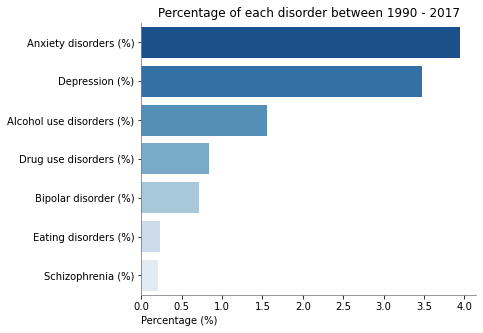

In [602]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = c_data.iloc[:, 2:9].mean().sort_values(ascending=False).reset_index() #Selecting just columns of all disorders
plt.figure(figsize=(6, 5))
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(y= plot_df['index'], x = plot_df[0], orient='h', palette='Blues_r')
plt.title('Percentage of each disorder between 1990 - 2017')
plt.ylabel('')
plt.xlabel('Percentage (%)', loc='left')
plt.show()

We discover that all years Anxiety is the one with mayor percentage but always have been the first one? Let's dive in each year. But first... We have the split by gender, let's find out this first and then continue with the years.

In these disorders, where does it have more prevalence? Man o Women? Let's take a look.

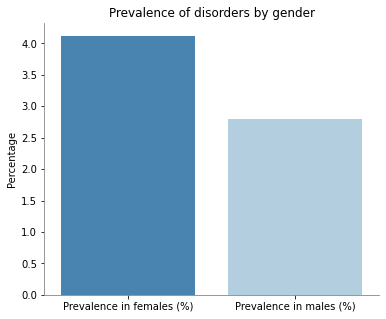

In [603]:
plot_mw = c_data.iloc[:, 9:11].mean().sort_values(ascending=False).reset_index() #Selecting columns for genders
plt.figure(figsize=(6, 5))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(y= plot_mw[0], x = plot_mw['index'], palette='Blues_r', orient='v')
plt.title('Prevalence of disorders by gender')
plt.ylabel('Percentage')
plt.xlabel('')
plt.show()

During the years between 1990-2017, women present a higher percentage compare to men. But during this period how percentages develop? Let's split by range of years.

In [604]:
plot2 = c_data.iloc[:, 1:9].groupby(pd.cut(c_data['Year'], np.arange(1990, 2018, 5))).mean() #We split years every 5 years.
plot2 = plot2.drop(columns=['Year']).reset_index().melt(id_vars='Year').sort_values(['Year', 'value'], ascending = [True, False]) #We group data by every 5 years, sorted and set as a variable all columns(disorders)
plot2['Year'] = plot2['Year'].astype(str) #Set 5 years range as string

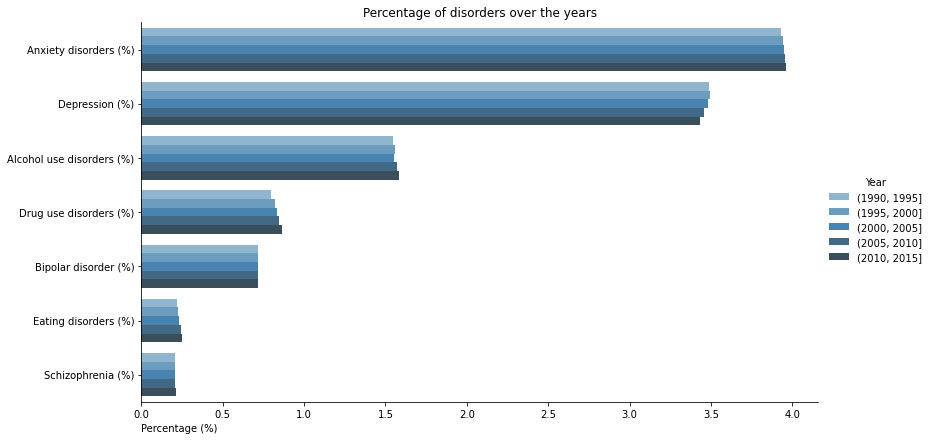

In [605]:
sns.catplot(x = "value",       
            y = "variable",       
            hue = "Year",  
            data = plot2,     
            kind = "bar", orient='h', palette='Blues_d', height=6, aspect=2) #Setting vertical bar, by each range of years (5 years) and using a pallet of blues
plt.title('Percentage of disorders over the years')
plt.ylabel('')
plt.xlabel('Percentage (%)', loc='left')
plt.show()

This plot can confirm that Anxiety always been the highest in the list, also have been increasing over the years. Except for depression, is the only one that is decreasing despite the increse of the population. 

As we see Anxiety and Depression disorders are in out top, lets evaluate in country level.

In [606]:
map = df1.iloc[:, [1, 2, 9]].groupby(['Code', 'Country']).median().reset_index() #We select the desorder we want to see in our map (Depression)
map2 = df1.iloc[:, [1, 2, 7]].groupby(['Code', 'Country']).median().reset_index() #We select the desorder we want to see in our map (Anxiety)


In [607]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations = map['Code'],
    z = map['Depression (%)'],
    text = map['Country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Depression (%)',
))

fig.update_layout(
    title_text='Depression (%)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
    ),
)
fig.layout.template = None
fig.show()

In [608]:
fig = go.Figure(data=go.Choropleth(
    locations = map2['Code'],
    z = map2['Anxiety disorders (%)'],
    text = map2['Country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Anxiety disorders Rate(%)',
))

fig.update_layout(
    title_text='Anxiety disorders Rate(%)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
    ),
)
fig.layout.template = None
fig.show()


Do they have any correleation between? Let's plot a heatmap to evaluate their numbers.

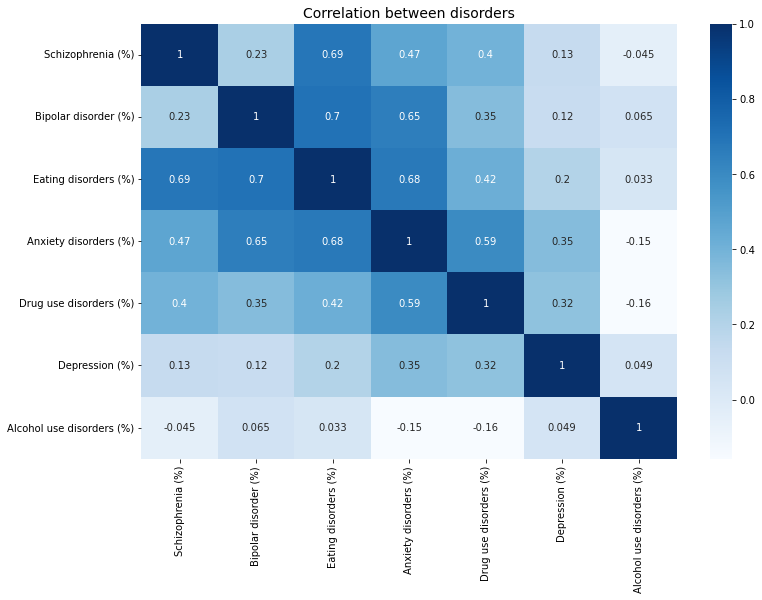

In [609]:
plt.figure(figsize=(12, 8))
plt.title('Correlation between disorders', fontdict={'size': 14})
corr_val = c_data.iloc[:, 2:9].corr() #Function call for correlation between our values
sns.heatmap(corr_val, 
            xticklabels = corr_val.columns.values,
            yticklabels = corr_val.columns.values,
            annot = True, cmap="Blues"); #Plot our heatmap with the correlation function, calculated before.

As we can observed Eating disorders has more correlative with other features, having 70% with Bipolar disorder. Second one would be Anxiety with 68% against the same Eating disorder.

Are these two has any correlation with Suicide rate? Let's find out

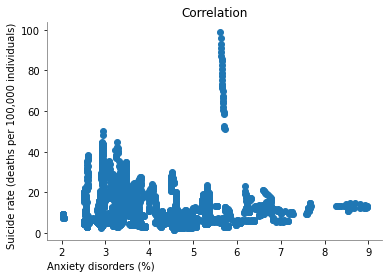

In [610]:
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.plot("Anxiety disorders (%)", "Suicide rate (deaths per 100,000 individuals)", data=c_data, linestyle='none', marker='o')
plt.title('Correlation')
plt.ylabel('Suicide rate (deaths per 100,000 individuals)', loc='top', multialignment='center')
plt.xlabel('Anxiety disorders (%)', loc='left')
plt.show()

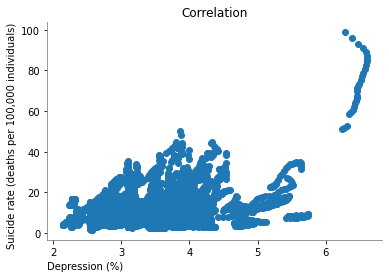

In [611]:
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.plot("Depression (%)", "Suicide rate (deaths per 100,000 individuals)", data=c_data, linestyle='none', marker='o')
plt.title('Correlation')
plt.ylabel('Suicide rate (deaths per 100,000 individuals)', loc='top', multialignment='center')
plt.xlabel('Depression (%)', loc='left')
plt.show()

Evaluating the two features, using a scatter plot, we can say that Depression has a higher correlation with suicide rate. Which tells us that we have to be aware of this percentage because in some points is driving an increase in the other rate.

Other point to mention is that both graphs have outliers and apparently seems to be a group of something. Let's deep dive in this one to explain these outliers.

As we can observe in the graph, both groups their rates are above 50, let's apply a filter in the following column to select only ones that are higher than 50.

In [612]:
a_s = c_data.loc[c_data['Suicide rate (deaths per 100,000 individuals)'] > 50] #Apply filter in columns with values that are outliers
a_s.head()

,Country,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
1904,Greenland,1990,0.322297,0.589591,0.481743,5.618805,1.692208,6.282583,3.392097,4.703362,8.151786,56000.0,98.831696,5804.372145,3549.367984
1905,Greenland,1991,0.320174,0.589740,0.480503,5.628190,1.685110,6.382405,3.409883,4.765410,8.267927,56000.0,96.085164,5896.535170,3575.366649
1906,Greenland,1992,0.318373,0.590087,0.479355,5.637049,1.679329,6.472683,3.429578,4.821883,8.376009,56000.0,93.230629,5979.525887,3578.386025
1907,Greenland,1993,0.317009,0.590331,0.477928,5.641694,1.678518,6.539495,3.450729,4.866115,8.458938,56000.0,91.071428,6040.269833,3576.849630
1908,Greenland,1994,0.316124,0.590683,0.476551,5.644656,1.678047,6.582469,3.471894,4.894211,8.515622,56000.0,89.225496,6078.706709,3584.122215


As we can see Greenland is the group that of outliers, after some reasearch on the internet, we discover that this has been a issue since 1970 where their rates unfutunately have been increasing. Due this issue, NGO's have made several campaign to prevent suicide. We will continue looking some data relatated to this topic and add to complement this part.

Plotting again the graphs without Greenland effect:

In [613]:
c_data = c_data.loc[c_data['Country'] != 'Greenland'] #Exclude the outliers (Greenland) for a better view of the plot

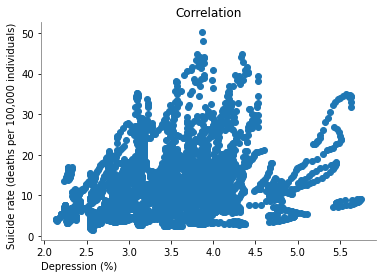

In [614]:
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.plot("Depression (%)", "Suicide rate (deaths per 100,000 individuals)", data=c_data, linestyle='none', marker='o')
plt.title('Correlation')
plt.ylabel('Suicide rate (deaths per 100,000 individuals)', loc='top', multialignment='center')
plt.xlabel('Depression (%)', loc='left')
plt.show()

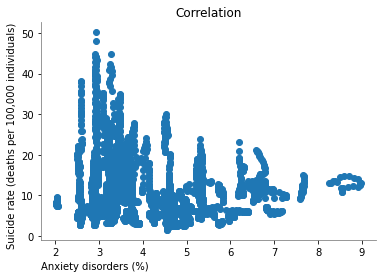

In [615]:
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.plot("Anxiety disorders (%)", "Suicide rate (deaths per 100,000 individuals)", data=c_data, linestyle='none', marker='o')
plt.title('Correlation')
plt.ylabel('Suicide rate (deaths per 100,000 individuals)', loc='top', multialignment='center')
plt.xlabel('Anxiety disorders (%)', loc='left')
plt.show()

Having more clear graphs, depressión has a strong relationship with suicide rates. In Anxiety doesn't, we can observe that in rates between 2-4 has the higher rate. Let's see this range in out dataset

In [616]:
ar = c_data.loc[(c_data['Anxiety disorders (%)'] < 4)].groupby(['Country'])['Drug use disorders (%)'].mean().drop(columns=['Year']) #Apply filter in column to Axiety values less than 4
af = c_data.loc[(c_data['Anxiety disorders (%)'] > 4)].groupby(['Country'])['Drug use disorders (%)'].mean().drop(columns=['Year']) #Apply filter in column to Axiety values more than 4
ar.loc['Countries with Anxiety (%) < 4'] = ar.mean() #Set another row in the table with mean of the column Anxiety
af.loc['Countries with Anxiety (%) > 4'] = af.mean() 
ar = ar.reset_index()
af = af.reset_index()
f1 = ar.loc[ar['Country'] == 'Countries with Anxiety (%) < 4'] #Just select the row with the mean
f2 = af.loc[af['Country'] == 'Countries with Anxiety (%) > 4']
pd.concat([f1, f2])

,Country,Drug use disorders (%)
121,Countries with Anxiety (%) < 4,0.635947
74,Countries with Anxiety (%) > 4,1.148552


After review all features we discovered that the main difference between this range 2-4, was the Drug use disorder, so in countries which Anxiety disorder higher than 4, their Drug disorder is high. In our previous heatmap, we saw that these two disorders has a positive correlation of 60%, which means that one is increasing the other.

Another question that comes to the table, do these disorders have any relation with HDI (Human Development Index)? This index has indicator such as Life Expectancy, Years of Schooling, GNI per capita (A decent standard of living). Let's have a look at it. The source of this HDI was taken in: https://hdr.undp.org/data-center/human-development-index#/indicies/HDI

Download are data and transform into csv file. Let's create DataFrame for this dataset

In [617]:
hdi = pd.read_csv('./Files/HDI.csv', encoding = 'unicode_escape')
hdi.head()

,Country,1990,2000,2010,2015,2018,2019,2020,2021
0,Switzerland,0.85,0.89,0.94,0.95,0.96,0.96,0.96,0.96
1,Norway,0.84,0.91,0.94,0.95,0.96,0.96,0.96,0.96
2,Iceland,0.81,0.87,0.90,0.95,0.96,0.96,0.96,0.96
3,Hong Kong,0.79,0.85,0.91,0.94,0.95,0.95,0.95,0.95
4,Australia,0.87,0.90,0.92,0.93,0.94,0.94,0.95,0.95


The HDI is calculated as the geometric mean (equally-weighted) of life expectancy, education, and GNI per capita. This index is between 0 and 1, being close to 1 indicate better Human Development. For more information about these metrics, you can access to: https://ourworldindata.org/human-development-index#:~:text=The%20HDI%20is%20calculated%20as,and%20expected%20years%20of%20schooling).

Let's plot the trend of this index during this period. Please note that in the next graph, Y values will start from mean of year 1990 (0.44), this is for a better understanding changes overtime.

/var/folders/pb/qp199g_d1w37vfktmm2c9hgh0000gn/T/ipykernel_5899/784569583.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



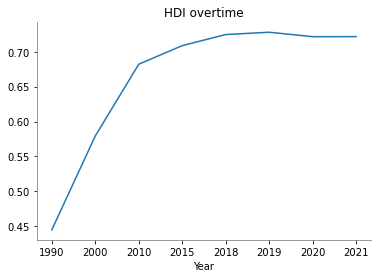

In [618]:
w = hdi.loc['World'] = hdi.mean() #Adding a row with the mean of each year
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.lineplot(data=w)
plt.title('HDI overtime')
plt.xlabel('Year', loc='center')
plt.show()

As we can observe, HDI has been increasing since 1990. That's a good sign of the humanity, our communities are having better life year over years. Looking after this graph, because of this development, has this index a correlation with our Anxiety increase?

Our DataFrame is split by years, let's measure until 2015, so It can be the same as our data from disorders

In [619]:
hdi['HDI Med 90-15'] = hdi[['1990', '2000', '2010', '2015']].median(axis=1) #Adding new column with the mean of the years between 1990-2015
hdi.head()

,Country,1990,2000,2010,2015,2018,2019,2020,2021,HDI Med 90-15
0,Switzerland,0.85,0.89,0.94,0.95,0.96,0.96,0.96,0.96,0.915
1,Norway,0.84,0.91,0.94,0.95,0.96,0.96,0.96,0.96,0.925
2,Iceland,0.81,0.87,0.90,0.95,0.96,0.96,0.96,0.96,0.885
3,Hong Kong,0.79,0.85,0.91,0.94,0.95,0.95,0.95,0.95,0.880
4,Australia,0.87,0.90,0.92,0.93,0.94,0.94,0.95,0.95,0.910


Now we have our median. In this case we use median because some of our data was missing, was filled up with zeros, and we didn't want the outliers to interfere in the last statistics. Previous years didn't collect enough data from all countries.

In [620]:
newdf = c_data.iloc[:, :9].groupby(['Country'])[['Anxiety disorders (%)', 'Depression (%)']].mean().reset_index() #From our clean dataset, just wanted three columns Country, Anxiety and Depression.
newdf.head()

,Country,Anxiety disorders (%),Depression (%)
0,Afghanistan,4.848102,4.118622
1,Albania,3.368903,2.190442
2,Algeria,5.011396,3.657743
3,American Samoa,3.293312,2.940850
4,Andorra,5.279751,3.739451


Let's merge our tables with data that match on country column

In [621]:
totl = pd.merge(newdf, hdi[['Country', 'HDI Med 90-15']], how='inner', on='Country') #Merged of the two new DataFrame
totl.head()

,Country,Anxiety disorders (%),Depression (%),HDI Med 90-15
0,Afghanistan,4.848102,4.118622,0.395
1,Albania,3.368903,2.190442,0.715
2,Algeria,5.011396,3.657743,0.685
3,Andorra,5.279751,3.739451,0.835
4,Angola,3.253057,4.183141,0.445


Now we have them merged, let's plot a scatter plot to have a look if exists any correlation between Anxiety and HDI.

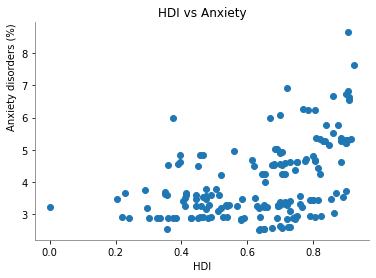

In [622]:
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.plot("HDI Med 90-15", "Anxiety disorders (%)", data=totl, linestyle='none', marker='o')
plt.title('HDI vs Anxiety')
plt.ylabel('Anxiety disorders (%)', loc='top', multialignment='center')
plt.xlabel('HDI', loc='center')
plt.show()

We can observe that this two have a positive correlation, is no that strong (0.45) but as we saw, our development improvement is leading in somehow our Anxiety. Let's review our countries with more than 6% of Anxiety.

In [623]:
totl.loc[totl['Anxiety disorders (%)'] > 6] #Selecting countries with Anxiety disorder more than 6

,Country,Anxiety disorders (%),Depression (%),HDI Med 90-15
6,Argentina,6.237986,3.639181,0.805
8,Australia,6.550010,4.795486,0.910
23,Brazil,6.073743,3.692280,0.700
31,Chile,6.245018,4.208620,0.785
54,France,6.686942,4.377329,0.860
58,Germany,6.633030,3.904906,0.910
72,Iran,6.932546,4.874333,0.720
86,Lebanon,6.002982,3.677472,0.375
110,Netherlands,6.816901,4.086445,0.905
111,New Zealand,8.651309,4.086397,0.905


This group has very similar numbers, just one is highlighted, and that one is Lebanon. The only one in the group with a low HDI. 

Doing research in google about this country, in one study made in 2017-2018, their conclusion was that are several factors associated with anxiety, for example: Divorce, depression, and emotional work fatigue. This study also mentioned that Lebanese still feel ashamed to visit clinicians and seek treatment due to cultural reasons. Psychotherapy interventions may be beneficial to help. For more information about the study: https://www.psychiatrist.com/pcc/anxiety/social-anxiety-correlates-among-lebanese-adults-role-self-esteem-depression-alcohol-use-disorder-alexithymia-work-fatigue/